In [1]:
import intake
intake.output_notebook()

In [3]:
intake.open_csv?

In [10]:
names = ['age', 'feh', 'distance', 'AV', 'alpha', 'gamma', 'fB', 'lnpost']
csv_kwargs = dict(names=names, delim_whitespace=True)
source = intake.open_csv('https://bio.rc.ufl.edu/pub/tmorton/cluster_chains/test/mist-cluster-post_equal_weights.dat',
                         csv_kwargs=csv_kwargs)

In [11]:
source.discover()

{'datashape': None,
 'dtype': {'age': 'float64',
  'feh': 'float64',
  'distance': 'float64',
  'AV': 'float64',
  'alpha': 'float64',
  'gamma': 'float64',
  'fB': 'float64',
  'lnpost': 'float64'},
 'shape': (None, 8),
 'npartitions': 1,
 'metadata': {}}

In [12]:
print(source.yaml())

sources:
  csv:
    args:
      csv_kwargs:
        delim_whitespace: true
        names:
        - age
        - feh
        - distance
        - AV
        - alpha
        - gamma
        - fB
        - lnpost
      urlpath: https://bio.rc.ufl.edu/pub/tmorton/cluster_chains/test/mist-cluster-post_equal_weights.dat
    description: ''
    driver: csv
    metadata: {}



In [28]:
%%writefile test_fit.yaml

sources:
  posterior:
    args:
      csv_kwargs:
        delim_whitespace: true
        names:
        - age
        - feh
        - distance
        - AV
        - alpha
        - gamma
        - fB
        - lnpost
      urlpath: https://bio.rc.ufl.edu/pub/tmorton/cluster_fits/test/mist-cluster-post_equal_weights.dat
    description: "Posterior samples for fit of test star cluster of 50 stars.  Fit performed using MultiNest"
    driver: csv
    cache:
      - argkey: urlpath
        regex: 'post_equal_weights.dat'
        type: file
    metadata:
        truths:
            - 8.84
            - -0.2
            - 500
            - 0.03
            - -3
            - 0.3
            - 0.3


Overwriting test_fit.yaml


In [29]:
cat = intake.open_catalog('test_fit.yaml')

In [32]:
cat.posterior.metadata

{'truths': [8.84, -0.2, 500, 0.03, -3, 0.3, 0.3],
 'cache': [{'argkey': 'urlpath',
   'regex': 'post_equal_weights.dat',
   'type': 'file'}],
 'catalog_dir': '/Users/tdm/repositories/starcluster-fit/'}

In [30]:
df = cat.posterior.read()

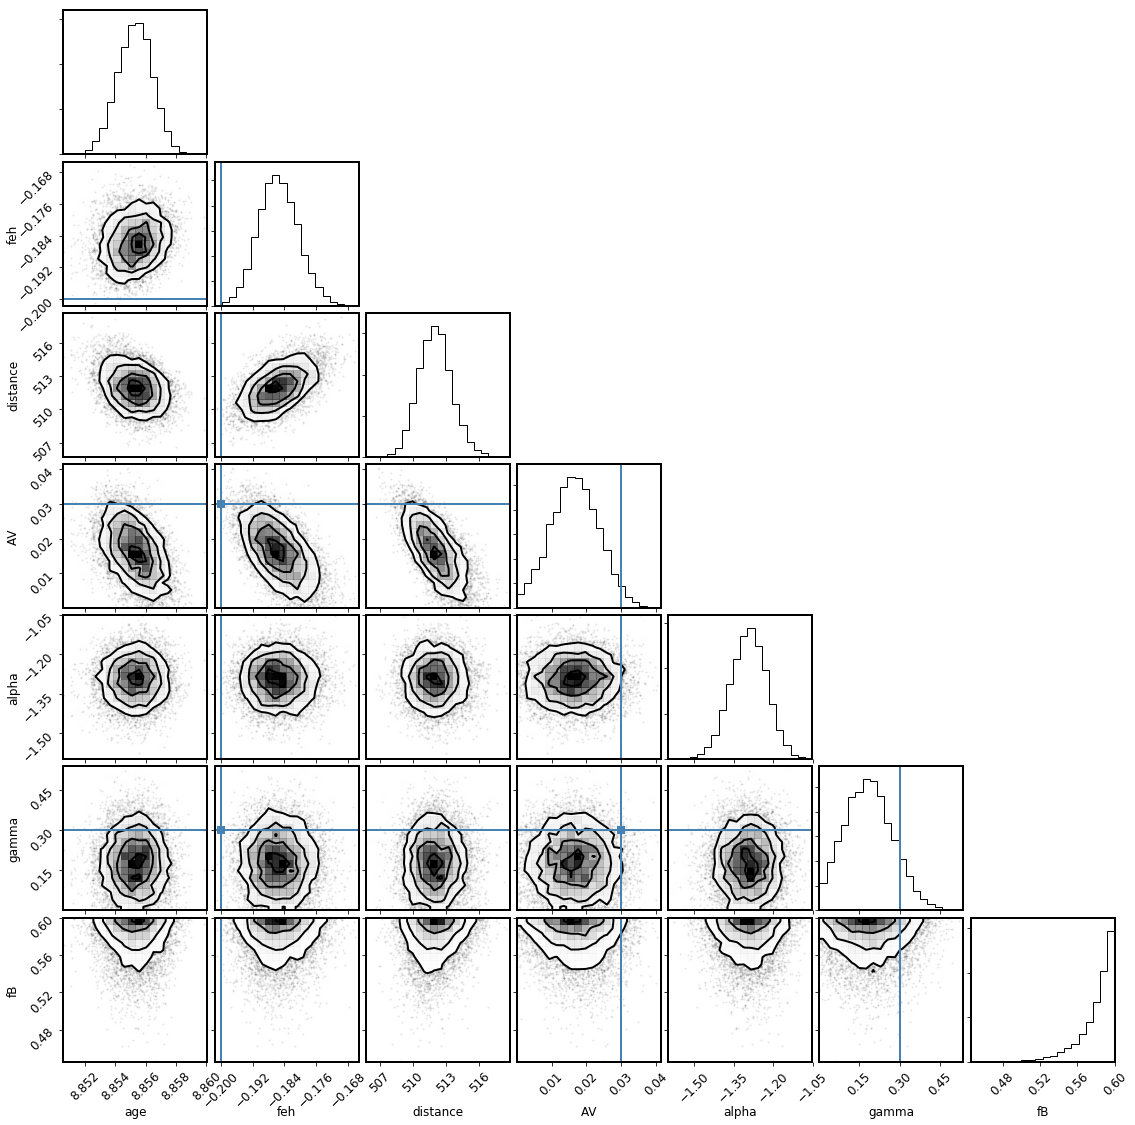

In [36]:
%matplotlib inline
import corner

fig = corner.corner(df[names[:-1]], names=names, truths=cat.posterior.metadata['truths'])

In [13]:
import pandas as pd

In [15]:
ls -ltr *.h5

-rw-r--r--  1 tdm  staff  688144 Oct 23 10:43 testrun2_chains.h5
-rw-r--r--  1 tdm  staff  619608 Oct 23 14:38 test-binary_chains.h5
-rw-r--r--  1 tdm  staff   10608 Oct 23 22:33 test-binary_stars.h5
-rw-r--r--  1 tdm  staff   17288 Oct 30 09:28 small-test-cluster.h5
